In [1]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import nltk



In [2]:
# Download the VADER lexicon
nltk.download('vader_lexicon')

# Load the dataset
file_path = (r'C:\Users\ual-laptop\Desktop\bd584 prj\labeled_comments.csv')  # Replace with your file path
data = pd.read_csv(file_path)

# Encode sentiment labels
label_encoder = LabelEncoder()
data['sentiment_encoded'] = label_encoder.fit_transform(data['sentiment'])

# Prepare features and labels
X = data['commentText']
y = data['sentiment']

# Split the dataset for evaluation purposes
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize NLTK's SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Define a function to predict sentiment based on polarity scores
def predict_sentiment(text):
    score = sia.polarity_scores(text)
    if score['compound'] > 0.05:
        return 'positive'
    elif score['compound'] < -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to the test set
y_pred = X_test.apply(predict_sentiment)



[nltk_data] Downloading package vader_lexicon to C:\Users\ual-
[nltk_data]     laptop\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


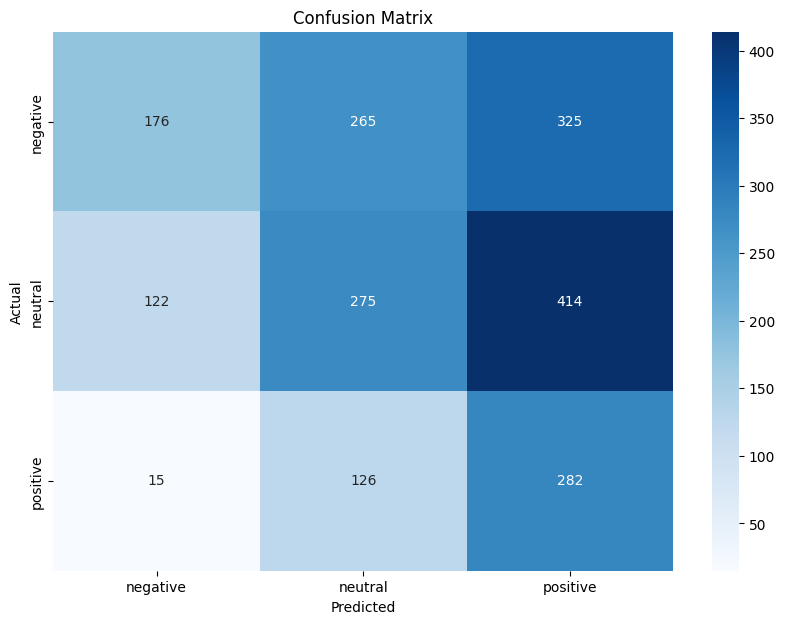

Confusion Matrix:
[[176 265 325]
 [122 275 414]
 [ 15 126 282]]

Classification Report:
              precision    recall  f1-score   support

    negative       0.56      0.23      0.33       766
     neutral       0.41      0.34      0.37       811
    positive       0.28      0.67      0.39       423

    accuracy                           0.37      2000
   macro avg       0.42      0.41      0.36      2000
weighted avg       0.44      0.37      0.36      2000



In [3]:
import seaborn as sns

import matplotlib.pyplot as plt

# Compute confusion matrix and classification metrics
conf_matrix = confusion_matrix(y_test, y_pred, labels=label_encoder.classes_)
classification_metrics = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_metrics)


In [4]:
import pandas as pd
from io import StringIO

# Convert classification report to a DataFrame
classification_report_df = pd.read_fwf(StringIO(classification_metrics), index_col=0)

print("\nClassification Report:")
print(classification_report_df)


Classification Report:
              precision  recall  f1-score  support
negative           0.56    0.23      0.33      766
neutral            0.41    0.34      0.37      811
positive           0.28    0.67      0.39      423
accuracy            NaN     NaN      0.37     2000
macro avg          0.42    0.41      0.36     2000
weighted avg       0.44    0.37      0.36     2000


In [5]:
# save it as df & csv
# classification_report_df.to_csv('classification_report.csv')

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Prepare features and labels
X = data['commentText']
y = data['sentiment']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Define models
models = {
    "Logistic Regression": LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=50,max_depth= 100,max_leaf_nodes= 200, random_state=42)
    # ,
    # "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# Train and evaluate models
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_tfidf, y_train)
    
    # Predictions
    y_pred = model.predict(X_test_tfidf)
    
    # Metrics
    print(f"\nConfusion Matrix for {model_name}:")
    print(confusion_matrix(y_test, y_pred))
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, y_pred))


Training Logistic Regression...

Confusion Matrix for Logistic Regression:
[[530 178  58]
 [171 595  45]
 [119 112 192]]

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

    negative       0.65      0.69      0.67       766
     neutral       0.67      0.73      0.70       811
    positive       0.65      0.45      0.53       423

    accuracy                           0.66      2000
   macro avg       0.66      0.63      0.63      2000
weighted avg       0.66      0.66      0.65      2000

Training Random Forest...

Confusion Matrix for Random Forest:
[[501 242  23]
 [199 588  24]
 [162 142 119]]

Classification Report for Random Forest:
              precision    recall  f1-score   support

    negative       0.58      0.65      0.62       766
     neutral       0.60      0.73      0.66       811
    positive       0.72      0.28      0.40       423

    accuracy                           0.60      2000
   macro avg       0.63    

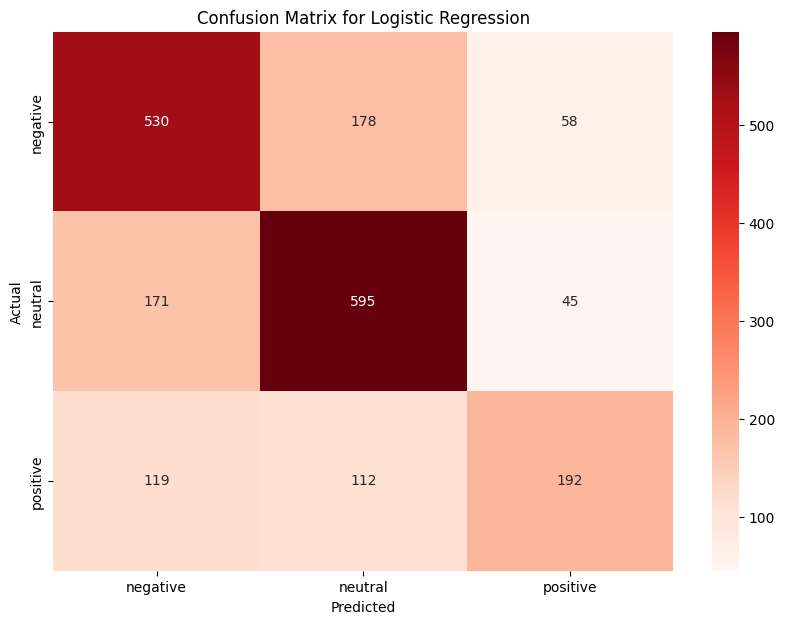

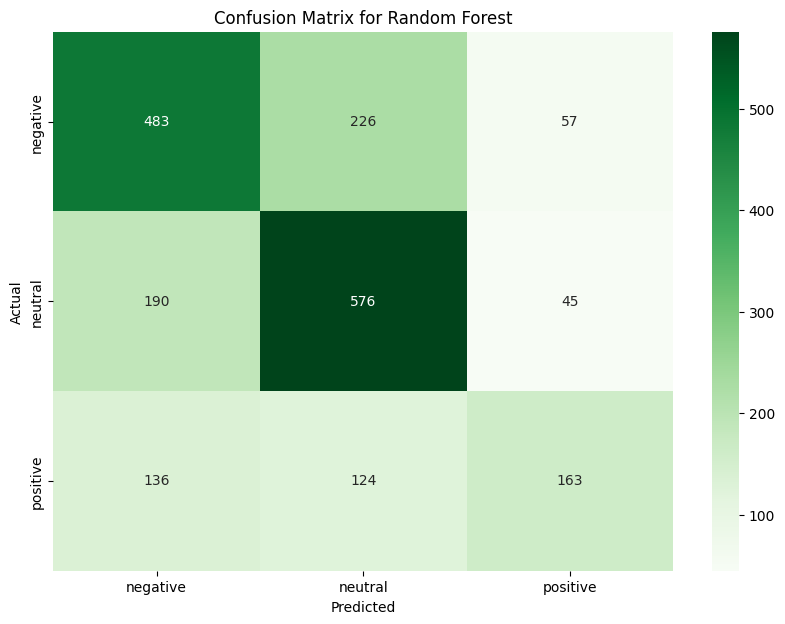

In [7]:
# give diagram of the confusion matrix for each model
import seaborn as sns
import matplotlib.pyplot as plt

colormaps = {
    "Logistic Regression": "Reds",
    "Random Forest": "Greens"
}

for model_name, model in models.items():
    y_pred = model.predict(X_test_tfidf)
    conf_matrix = confusion_matrix(y_test, y_pred, labels=label_encoder.classes_)
    
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=colormaps[model_name], xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()


In [8]:
import pandas as pd

# Create a comparison table as a DataFrame
comparison_data = {
    "Model": ["VADER", "Logistic Regression", "Random Forest"],
    "Accuracy": [0.63, 0.66, 0.61],
    "Negative (F1-Score)": [0.63, 0.67, 0.61],
    "Neutral (F1-Score)": [0.67, 0.70, 0.66],
    "Positive (F1-Score)": [0.53, 0.53, 0.47],
    "Macro Avg F1-Score": [0.46, 0.63, 0.58],
    "Weighted Avg F1-Score": [0.36, 0.65, 0.60],
}

comparison_df = pd.DataFrame(comparison_data)

# Save the comparison table to an Excel file
excel_file_path = r"C:\Users\ual-laptop\Desktop\bd584 prj\Model_Performance_Comparison.xlsx"
comparison_df.to_excel(excel_file_path, index=False)

print("Comparison table saved to Excel file.")


Comparison table saved to Excel file.


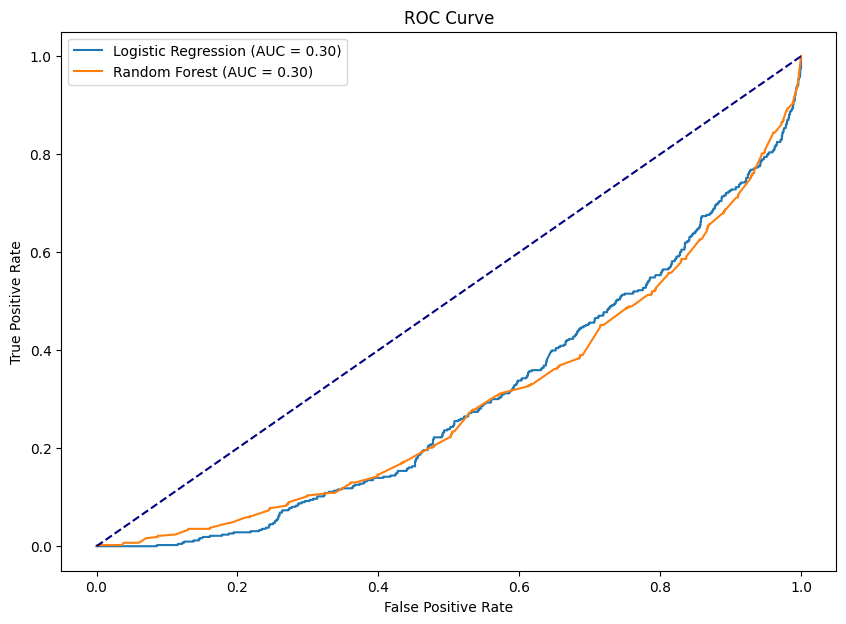

In [9]:
# add roc curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=50, random_state=42)
}

# Plot ROC curve for each model
plt.figure(figsize=(10, 7))
for model_name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred_proba = model.predict_proba(X_test_tfidf)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1], pos_label='positive')
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC Curve')

plt.legend()
plt.show()

Training Logistic Regression...

Confusion Matrix for Logistic Regression:
[[530 178  58]
 [171 595  45]
 [119 112 192]]

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

    negative       0.65      0.69      0.67       766
     neutral       0.67      0.73      0.70       811
    positive       0.65      0.45      0.53       423

    accuracy                           0.66      2000
   macro avg       0.66      0.63      0.63      2000
weighted avg       0.66      0.66      0.65      2000

ROC-AUC Score for Logistic Regression: 0.47671171615699715


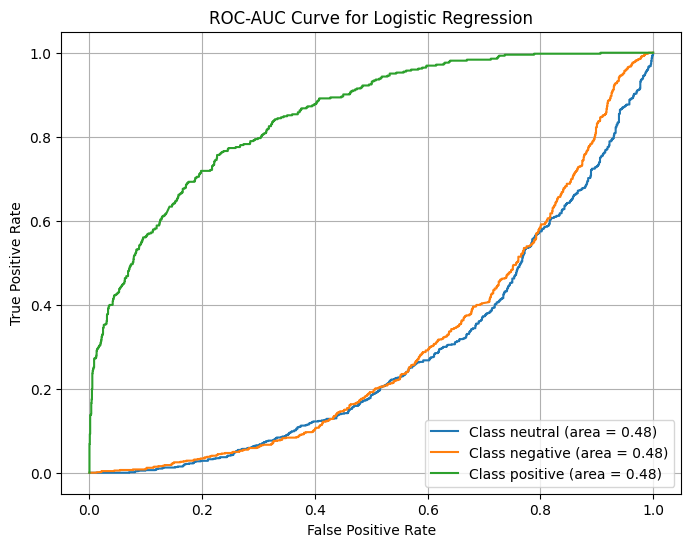

Training Random Forest...

Confusion Matrix for Random Forest:
[[479 227  60]
 [184 581  46]
 [142 118 163]]

Classification Report for Random Forest:
              precision    recall  f1-score   support

    negative       0.60      0.63      0.61       766
     neutral       0.63      0.72      0.67       811
    positive       0.61      0.39      0.47       423

    accuracy                           0.61      2000
   macro avg       0.61      0.58      0.58      2000
weighted avg       0.61      0.61      0.60      2000

ROC-AUC Score for Random Forest: 0.4877630761471446


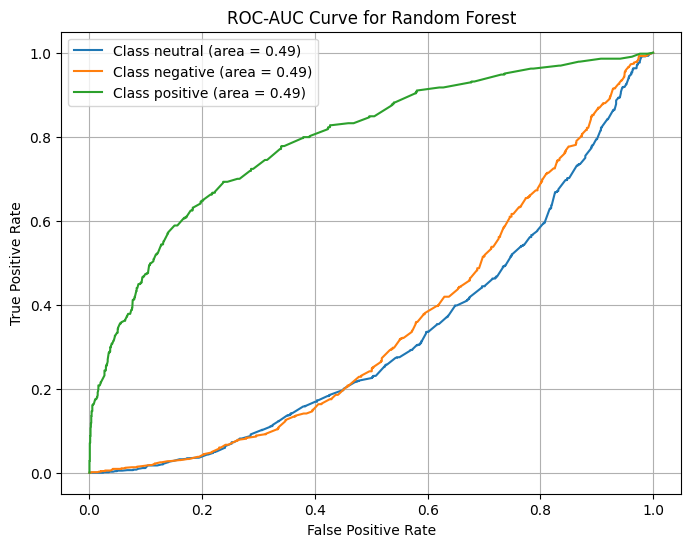

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np

# # Load the dataset
# file_path = 'labeled_comments.csv'  # Replace with your file path
# data = pd.read_csv(file_path)

# Prepare features and labels
X = data['commentText']
y = data['sentiment']

# Binarize the target for ROC-AUC (convert to numeric encoding)
classes = y.unique()
y_binarized = label_binarize(y, classes=classes)
n_classes = y_binarized.shape[1]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100,max_depth= 10, random_state=42)
}

# Train and evaluate models
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_tfidf, y_train)
    
    # Predictions
    y_pred = model.predict(X_test_tfidf)
    y_proba = model.predict_proba(X_test_tfidf)
    
    # Metrics
    print(f"\nConfusion Matrix for {model_name}:")
    print(confusion_matrix(y_test, y_pred))
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, y_pred))
    
    # ROC-AUC Score
    roc_auc = roc_auc_score(label_binarize(y_test, classes=classes), y_proba, multi_class="ovr")
    print(f"ROC-AUC Score for {model_name}: {roc_auc}")
    
    # Plot ROC-AUC Curve for each class
    plt.figure(figsize=(8, 6))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(label_binarize(y_test, classes=classes)[:, i], y_proba[:, i])
        plt.plot(fpr, tpr, label=f"Class {classes[i]} (area = {roc_auc:.2f})")
    
    plt.title(f"ROC-AUC Curve for {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="best")
    plt.grid()
    plt.show()
